In [ ]:
!pip install scanpy anndata igraph leidenalg

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=47a0d9e09ee8c4c7fc910e046a2f286c526aa50da48999e17c1612cf6fa9fe20
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998

In [ ]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import igraph
import leidenalg
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
adata = sc.read_h5ad('/content/drive/MyDrive/anndata.h5ad')

In [ ]:
def BasicScanpyPreprocessing(adata, n_top_genes = 2000, n_neighbors=10, n_pcs = 40, random_state = 20):
  sc.pp.normalize_total(adata, target_sum = 1e4)
  sc.pp.log1p(adata)
  sc.pp.highly_variable_genes(adata, n_top_genes = n_top_genes, flavor = 'seurat')
  #sc.pp.scale(adata, max_value=10)
  sc.tl.pca(adata, svd_solver = 'arpack')
  sc.pp.neighbors(adata, n_neighbors = n_neighbors, n_pcs = n_pcs, random_state = random_state)
  sc.tl.umap(adata, random_state = random_state)
  sc.tl.leiden(adata, random_state = random_state)
  return adata

In [ ]:
adata = BasicScanpyPreprocessing(adata)

/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
<ipython-input-4-74fc4889c969>:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state = random_state)


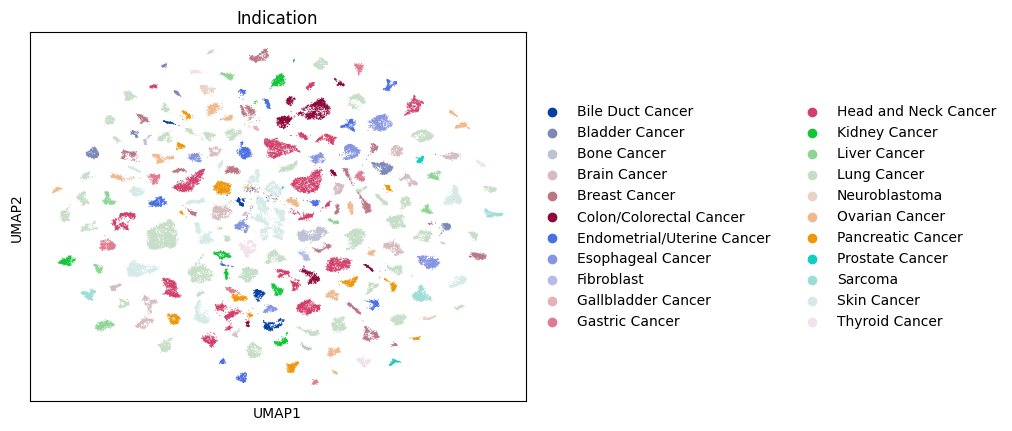

In [ ]:
sc.pl.umap(adata, color = ['Indication'])

In [ ]:
adata.layers['counts'] = adata.X.copy()
adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

In [14]:
def ExploreCellLines(gene, indication = 'Indication'):
  if(indication != 'Indication'):
    adata_indication = adata[adata.obs.Indication==indication].copy()
    df = sc.get.obs_df(adata_indication, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
    df['CellLine'] = adata_indication.obs['CellLine']
    sns.boxplot(data = df, x = 'CellLine', y = gene, hue = 'CellLine', showfliers = False)
    sns.stripplot(data = df, x = 'CellLine', y = gene, color = 'black', size = 1, jitter = True)
    plt.xticks(rotation = 90)
  else:
    df = sc.get.obs_df(adata, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
    df['Indication'] = adata.obs['Indication']
    sns.boxplot(data = df, x = 'Indication', y = gene, hue = 'Indication', showfliers = False)
    sns.stripplot(data = df, x = 'Indication', y = gene, color = 'black', size = 0.5, jitter = True)
    plt.xticks(rotation = 90)

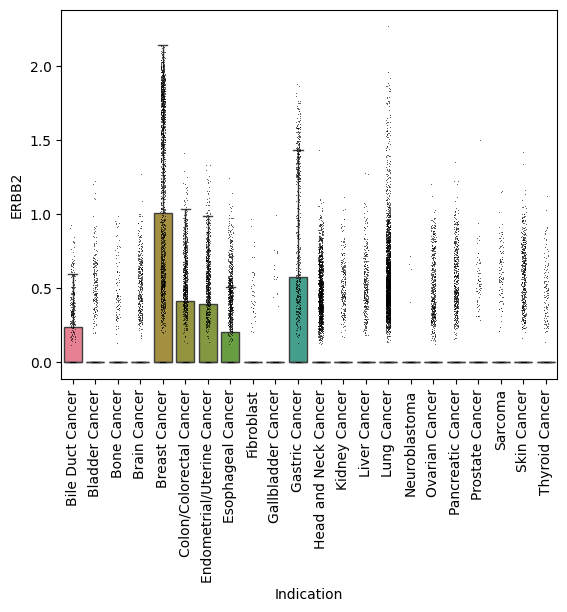

In [15]:
ExploreCellLines('ERBB2')

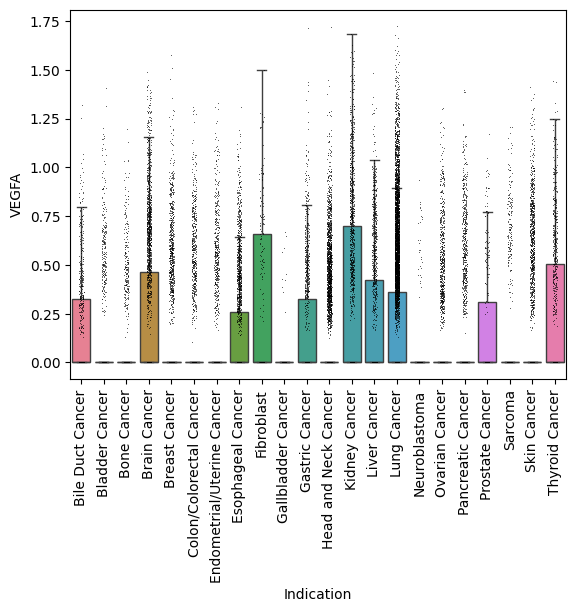

In [16]:
ExploreCellLines('VEGFA')

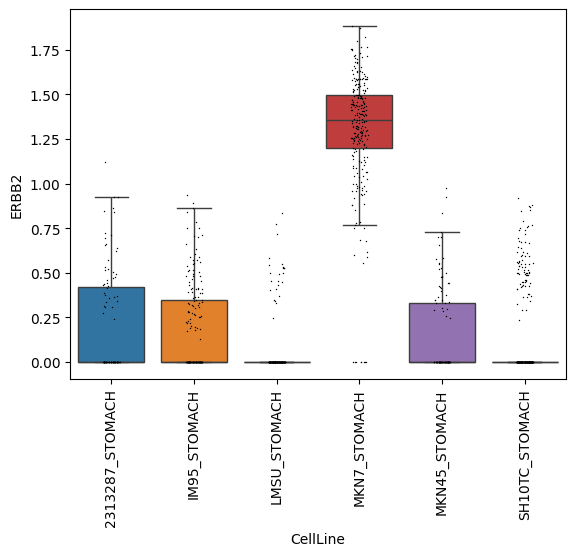

In [17]:
ExploreCellLines('ERBB2', 'Gastric Cancer')

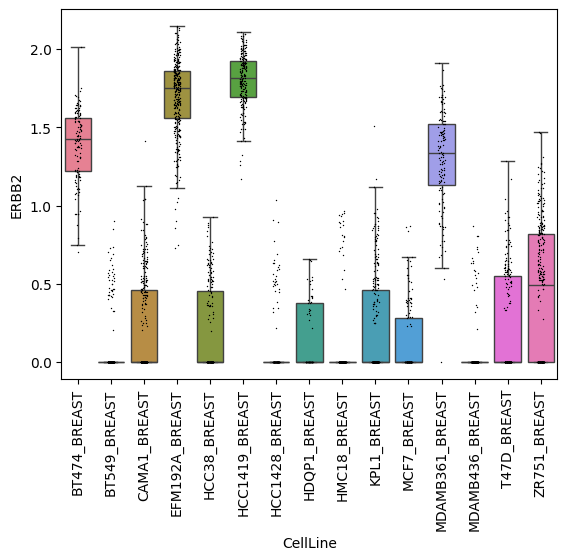

In [18]:
ExploreCellLines('ERBB2', 'Breast Cancer')

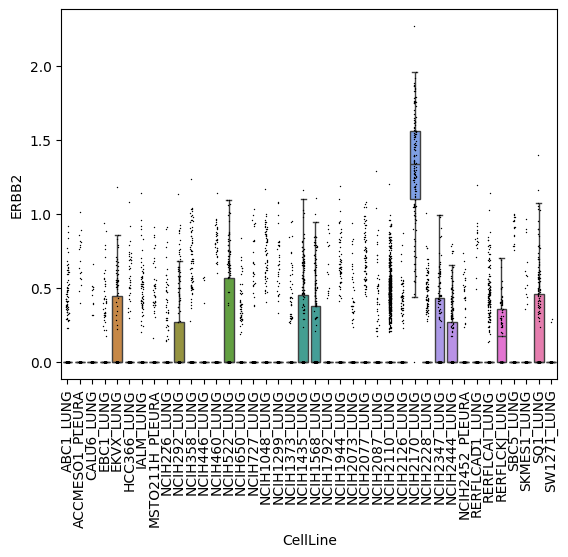

In [19]:
ExploreCellLines('ERBB2', 'Lung Cancer')

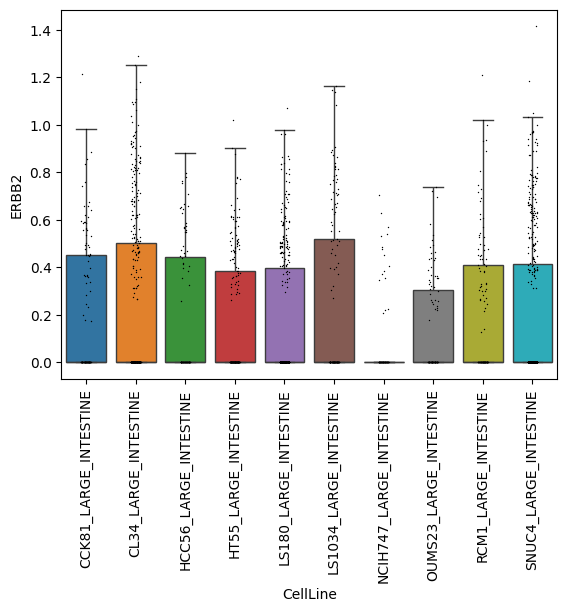

In [24]:
ExploreCellLines('ERBB2', 'Colon/Colorectal Cancer')

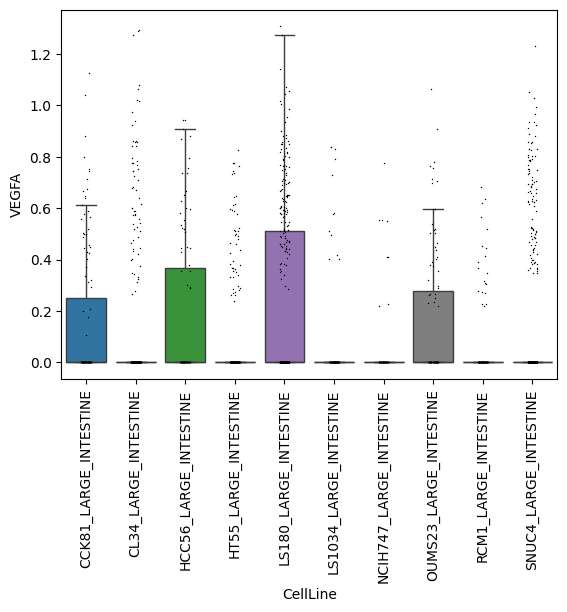

In [25]:
ExploreCellLines('VEGFA', 'Colon/Colorectal Cancer')

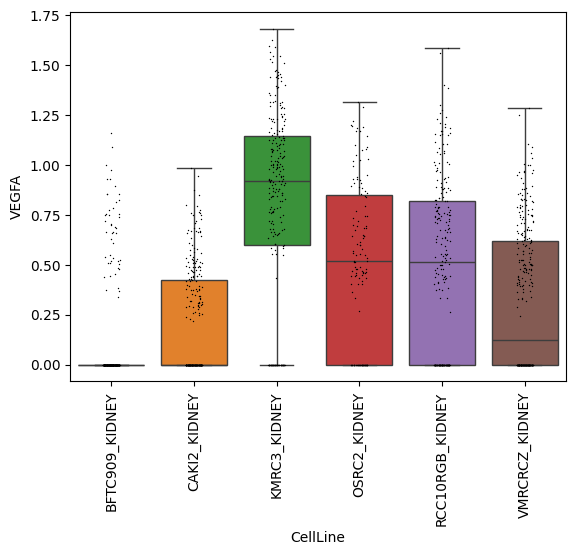

In [26]:
ExploreCellLines('VEGFA', 'Kidney Cancer')

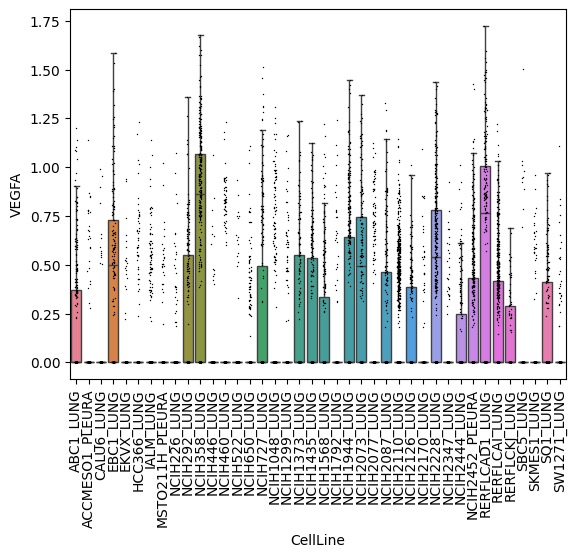

In [28]:
ExploreCellLines('VEGFA', 'Lung Cancer')